激活函数在 cs231n 的  [Lecture 6: Training Neural Networks, Part I](http://cs231n.stanford.edu/syllabus.html) 涉及。

### 参考

* [什么是激活函数？它有什么作用？](https://blog.csdn.net/zouzhen_id/article/details/79701002)
* [激活函数 百度百科](https://baike.baidu.com/item/激活函数/2520792?fr=aladdin)
* [几种常用激活函数的简介](https://blog.csdn.net/kangyi411/article/details/78969642)
* [深度学习 激活函数](https://www.cnblogs.com/home123/p/7484558.html)
* [神经网络激励函数的作用是什么？有没有形象的解释？](https://www.zhihu.com/question/22334626)

### 激活函数

我认为在 [神经网络激励函数的作用是什么？有没有形象的解释？](https://www.zhihu.com/question/22334626) 已经对激活函数解释的很清楚了，这里只能做出一些自己的理解。

谈一下神经网络的历史，首先是单层 [感知机](https://zh.wikipedia.org/wiki/感知器)，使用单层感知机实现了字母的识别。但是单层感知机最大的问题在于只能解决线性问题，也就是线性不可分，甚至连简单的异或问题也解决不了。

再之后就是多层感知机，解决了线性不可分的问题。到现在则是我们熟知的神经网络、卷积神经网络等。

但是对这几种，仍然脱离不了一个概念，对于单个神经元进行的操作是 $y=Wx+b$，也就是一个线性函数。就算是多层组合在一起，你把输入一层一层代入进去，最后得到的结果依然是一个线性函数，只不过这个线性函数比较复杂而已。更为具体点，多层感知机或神经网络只是多次矩阵的乘法。

**所以才需要激活函数，为神经网络引入非线性因素。** 这时候代入激活函数就会得到非常复杂的函数了: $\sigma(Wx+b)$

这张图形容的非常好:

![](https://tuchuang-1252747889.cosgz.myqcloud.com/2018-11-24-3e4d3aabb90f51f467437a17861d3bf7_hd.png)
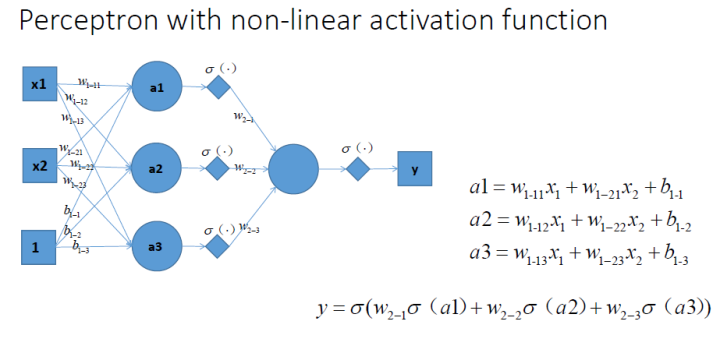

### 激活函数的性质

激活函数有以下性质:

* 非线性（应该也可以是线性的，但没有意义）
* 可微（通俗点就是可以求导，梯度下降时需要）

激活函数当然很好，但是使用激活函数时也面临两个问题：
* 梯度消失
* 梯度饱和

对于梯度下降法不了解的，可以参考我的 [从一元函数的角度理解梯度下降法](https://hzzone.io/3.%20cs231n/从一元函数的角度理解梯度下降法.html)。

假设损失函数 $L$ 在激活函数的梯度为 $\frac{\partial{L}}{\partial{\sigma}}$，输入激活函数的数据为 $x$。

激活函数输入:

$$z=\sum_{i}w_i x_i+b$$

则上一层 $w$ 的梯度则是（需要更新权重）:

$$\frac{\partial{L}}{\partial{w_i}} = \frac{\partial{L}}{\partial{\sigma}}\frac{\partial{\sigma}}{\partial{z}} x_i$$

这是导数的链式法则，需要了解一些反向传播的知识，权重是利用该层的梯度更新的。

**当 $\frac{\partial{\sigma}}{\partial{x}}$ 接近 0 时，也就是激活函数饱和，则是梯度消失，参数几乎不更新。**梯度消失的情况在具体的激活函数中会出现。

### 常用激活函数及其实现

In [6]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-10, 10, 10000)

#### Sigmoid

$$\sigma ( x ) = \frac { 1 } { 1 + e ^ { - x } }$$

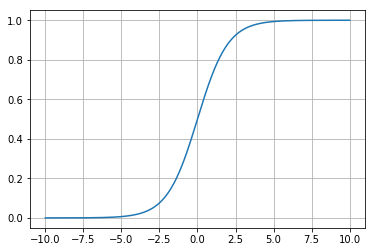

In [9]:
Y = 1/(1+np.exp(-X))
plt.plot(X, Y)
plt.grid()
plt.show()

Sigmoid 有一个很大的特性，对 Sigmoid 求导会发现，它的导数恰好是 $\sigma'(x)=\sigma(x)(1-\sigma(x))$

cs231n 问及：**Consider what happens when the input to a neuron is always positive...What can we say about the gradients on w?**

答案是 **Always all positive or all negative :( (this is also why you want zero-mean data!)** 在**非零为中心**中解答。

Sigmoid 面临的问题是:

* 饱和是梯度消失，当输入过大或过小，输出都接近于 1，这是导致导数接近于 0，因此出现梯度消失。所以 Sigmoid 对零附近的输入最敏感。
* 非零为中心。$sigmoid(x)$ 的值域为 $(-1, 1)$，会发现 Sigmoid 的导数一定大于 0，通过上面的梯度计算公式，如果一直 $x_i>0$ 或 $x_i<0$，会出现 $w$ 一直为正或者负。
* 指数计算复杂。

#### tanh

$$\tanh ( x )=\frac { e ^ { x } - e ^ { - x } } { e ^ { x } + e ^ { - x } }$$

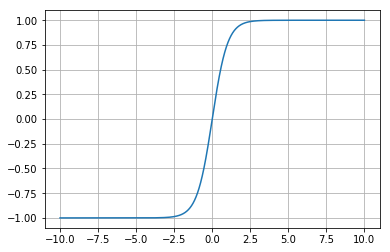

In [11]:
Y = np.tanh(X)
plt.plot(X, Y)
plt.grid()
plt.show()

和 Sigmoid 形状类似，但是 tanh 的值域为 $(-1,1)$。

对 tanh 求导可得:

$$\sigma' ( x )= \frac { 4 } { \left( e ^ { x } + e ^ { - x } \right) ^ { 2 } }$$

tanh 虽然满足 zero centered，关于原点对称，但是饱和时，仍然会出现梯度消失（梯度接近于 0），而且指数计算复杂。

#### ReLU(Rectified Linear Unit)

$$\max ( 0 , x )$$

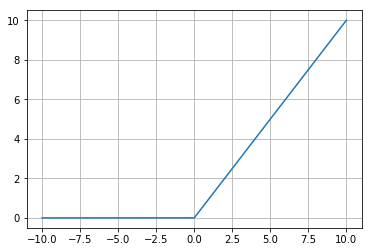

In [17]:
Y = np.maximum(0, X)
plt.plot(X, Y)
plt.grid()
plt.show()

ReLU 常用于深度学习中，好处显而易见:

* $x>0$ 不会饱和。
* 计算高效。
* 实际应用的时候收敛速度比 sigmoid/tanh 快很多。
* 比 sigmoid 更像生物上的神经元。

坏处是:

* 非 zero-centered。
* 当 $x<0$，通过上面的梯度公式，梯度直接为 0，也就是梯度消失。即 ReLU 不会被激活，不会更新参数。

需要注意的是，**ReLU 不能配合 Xavier 初始化使用**，这个希望能在权重初始化中介绍。

#### Leaky ReLU

$$
f ( x ) = \max ( 0.01 x , x )
$$

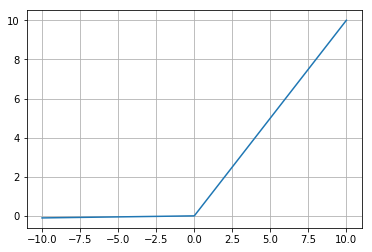

In [20]:
Y = np.maximum(0.01*X, X)
plt.plot(X, Y)
plt.grid()
plt.show()

ReLU 加上一点正的偏置就是 Leaky ReLU 了，通常用在 GAN 中。优势和面临的问题和 ReLU 一样，**但重要的是 Leaky ReLU 解决了 ReLU 的梯度消失问题，当 $x<0$，梯度不会消失。**

#### Parametric Rectifier (PReLU)

$$
f ( x ) = \max ( \alpha x , x )
$$

PReLU 将 Leaky ReLU 的偏置设为超参，$\alpha$ 需要优化，当 $\alpha=0.01$ 时就是 Leaky ReLU。反向传播的时候会出现 $\alpha$ 更新权重。

#### Exponential Linear Units (ELU)

$$
f ( x ) = \left\{ \begin{array} { l l } { x } & { \text { if } x > 0 } \\ { \alpha ( \exp ( x ) - 1 ) } & { \text { if } x \leq 0 } \end{array} \right.
$$

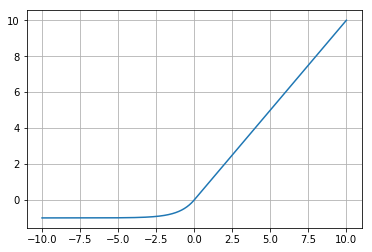

In [24]:
alpha = 1
import copy
Y = copy.deepcopy(X)
Y[Y<=0] = alpha*(np.exp(X[X<=0])-1)
plt.plot(X, Y)
plt.grid()
plt.show()

* ReLU 的所有优势。
* 改进之处是近似于 zero mean。
* $x$ 非常小时，出现饱和。
* 指数计算复杂

* #### Maxout

$$
\max \left( w _ { 1 } ^ { T } x + b _ { 1 } , w _ { 2 } ^ { T } x + b _ { 2 } \right)
$$

不是乘积再到激活函数，而是直接两个输出取最大。cs231n 描述 **Linear Regime! Does not saturate! Does not die!**

坏处是增加了一倍的参数。

### 激活函数使用技巧

* 使用 ReLU 时注意学习率，不能和 Xavier 初始化一起使用。
* 都试一下这几个激活函数: Leaky ReLU / Maxout / ELU。
* 可以尝试 tanh 但不要期望可以得到很好的效果。
* **不要使用 sigmoid**，cs231n 重点强调，可能是因为缺点太多。